In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/all-data/all_data.csv


In [11]:
# Carregar os dados
file_path = '/kaggle/input/all-data/all_data.csv'
data = pd.read_csv(file_path)

In [14]:
# Convertendo 'start_time' e 'end_time' para datetime
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])

# Removendo vírgulas dos valores em 'tripduration' usando apply e lambda
data['tripduration'] = data['tripduration'].apply(lambda x: x.replace(',', '') if isinstance(x, str) else x)

# Convertendo 'tripduration' para float
data['tripduration'] = data['tripduration'].astype(float)

# Convertendo 'ride_length' para timedelta
data['ride_length'] = pd.to_timedelta(data['ride_length'])

# Extraindo os minutos da coluna 'ride_length'
data['ride_length'] = data['ride_length'].dt.total_seconds() / 60

# Convertendo 'ride_length' para int
data['ride_length'] = data['ride_length'].astype(int)

# Convertendo 'usertype' e 'gender' para categorias
data['usertype'] = data['usertype'].astype('category')
data['gender'] = data['gender'].astype('category')

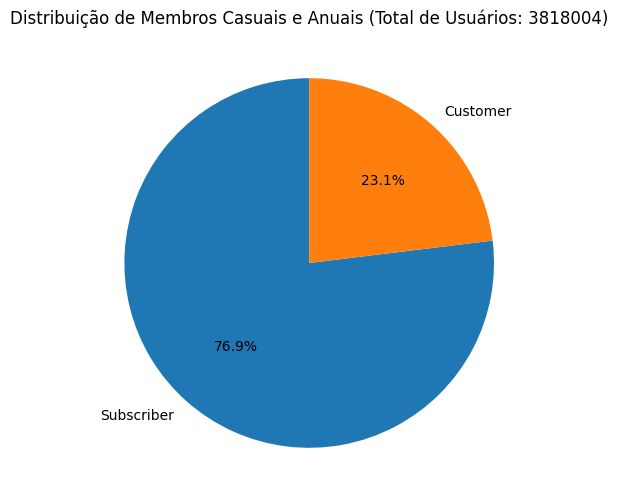

In [30]:
# Contar o número de membros casuais e anuais
user_type_counts = data['usertype'].value_counts()

# Criar gráfico de pizza com o número total de usuários
plt.figure(figsize=(10, 6))
plt.pie(user_type_counts, labels=user_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Membros Casuais e Anuais (Total de Usuários: {})'.format(len(data)))
plt.show()


## Pattern of Association with the Subscription:

### Customer Loyalty:

The high subscriber ratio indicates a solid loyal customer base. This could be the result of a positive service experience, exclusive subscriber benefits, or successful customer retention strategies.

### Subscriber Growth Potential:

Despite the predominance of subscribers, the company can explore opportunities to attract more casual users and convert them into subscribers. Specific marketing campaigns or exclusive offers for new subscribers can be effective.

### Behavior Analysis:

It is valuable to understand the travel behavior of casual users compared to subscribers. This can help personalize offers, making the service more attractive to different user segments.

### Enhanced Benefits for Subscribers:

Understanding subscribers' preferences and usage patterns can inform the company about improvements in the benefits offered, aimed at maintaining and attracting subscribers.

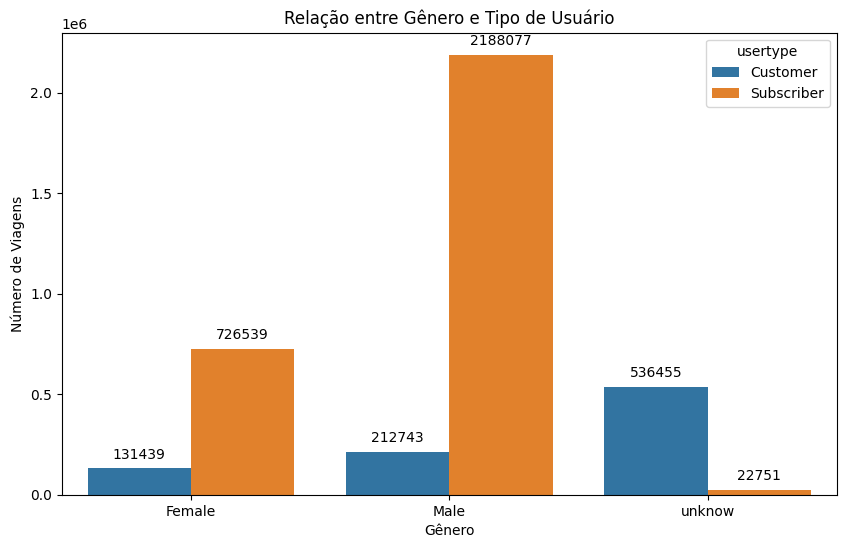

In [29]:
# Contagem de viagens para cada combinação de gênero e tipo de usuário
gender_user_count = data.groupby(['gender', 'usertype']).size().reset_index(name='count')

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='gender', y='count', hue='usertype', data=gender_user_count)

# Adicionar rótulos às barras
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', xytext = (0, 10),
                     textcoords = 'offset points')

plt.title('Relação entre Gênero e Tipo de Usuário')
plt.xlabel('Gênero')
plt.ylabel('Número de Viagens')

# Salvar as imagens
plt.savefig('genero_x_usuario')

# Exibir o gráfico
plt.show()

## Gender Distribution Analysis

- Of the 3,818,004 trips, trips made by member users represent 76.9 of the trips.
- Male users are responsible for 2,188,077 (74.5%) of trips taken by members.
- While female users are responsible for 726,539 (24.7%) trips. 

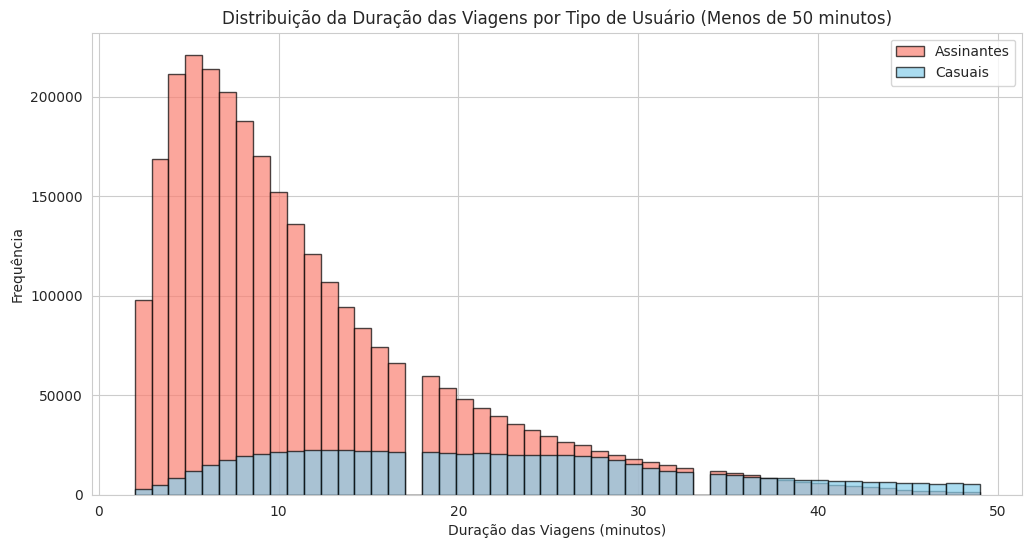

In [55]:
# Filtrar dados para viagens com duração entre 1 e 50 minutos
filtered_data = data[(data['ride_length'] > 1) & (data['ride_length'] < 50)]

# Criar subconjuntos de dados para usuários casuais e assinantes
casual_data = filtered_data[filtered_data['usertype'] == 'Customer']
subscriber_data = filtered_data[filtered_data['usertype'] == 'Subscriber']

# Configurar o layout do gráfico
plt.figure(figsize=(12, 6))

# Plotar histograma para assinantes
plt.hist(subscriber_data['ride_length'], bins=50, color='salmon', edgecolor='black', alpha=0.7, label='Assinantes')

# Plotar histograma para usuários casuais
plt.hist(casual_data['ride_length'], bins=50, color='skyblue', edgecolor='black', alpha=0.7, label='Casuais')

# Adicionar legendas e títulos
plt.title('Distribuição da Duração das Viagens por Tipo de Usuário (Menos de 50 minutos)')
plt.xlabel('Duração das Viagens (minutos)')
plt.ylabel('Frequência')
plt.legend()

# Exibir o gráfico
plt.show()

## Travel Distribution Analysis

- Short Duration (Less than 20 minutes): Most trips last less than 20 minutes. This may indicate that the majority of users use bicycles for short trips, such as trips between home and work, quick shopping, or other short-term activities.

- Variety in Durations: The fact that there is significant variety in trip durations suggests that bicycles are used for different purposes. Some trips may be very short, while others may be longer, meeting different mobility needs.

- Equality in Usage after 30 minutes: It was noted that, after 30 minutes, the number of users becomes similar. This may indicate that some users choose to use bicycles for longer periods, possibly for longer trips or journeys.

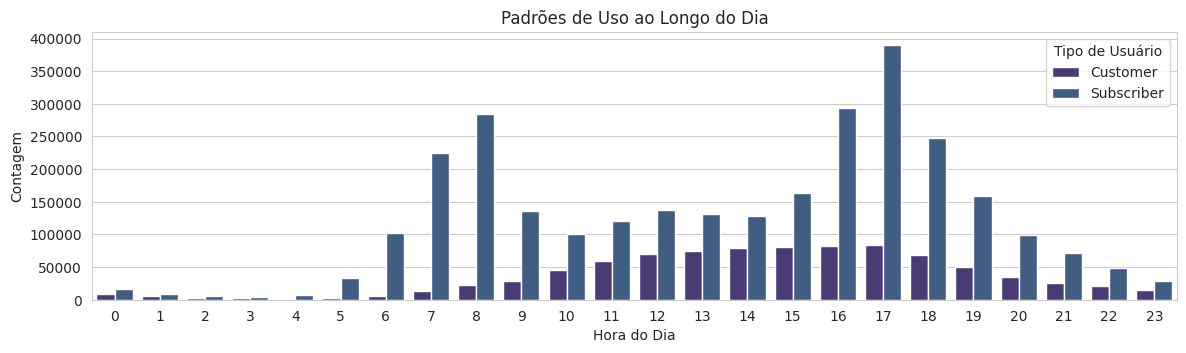

In [42]:
# Criar coluna 'hour' para representar a hora do dia
data['hour'] = data['start_time'].dt.hour

# Configurações visuais
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Plotar padrões de uso ao longo do dia
plt.figure(figsize=(14, 16))

plt.subplot(4, 1, 1)
sns.countplot(x='hour', data=data, hue='usertype')
plt.title('Padrões de Uso ao Longo do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Contagem')
plt.legend(title='Tipo de Usuário')

## Analysis of Usage Patterns

- Both groups have an increase in use in the morning, indicating likely trips to work or other daytime activities.
- Casual cyclists show a tendency to peak usage during the afternoon and early evening, indicating possible recreational use.
- Annual members maintain a more stable distribution throughout the day.
- Casual cyclists tend to show greater variations during the day, suggesting more flexible and recreational use.
- Annual members maintain more stable patterns, indicating possible regular displacements.


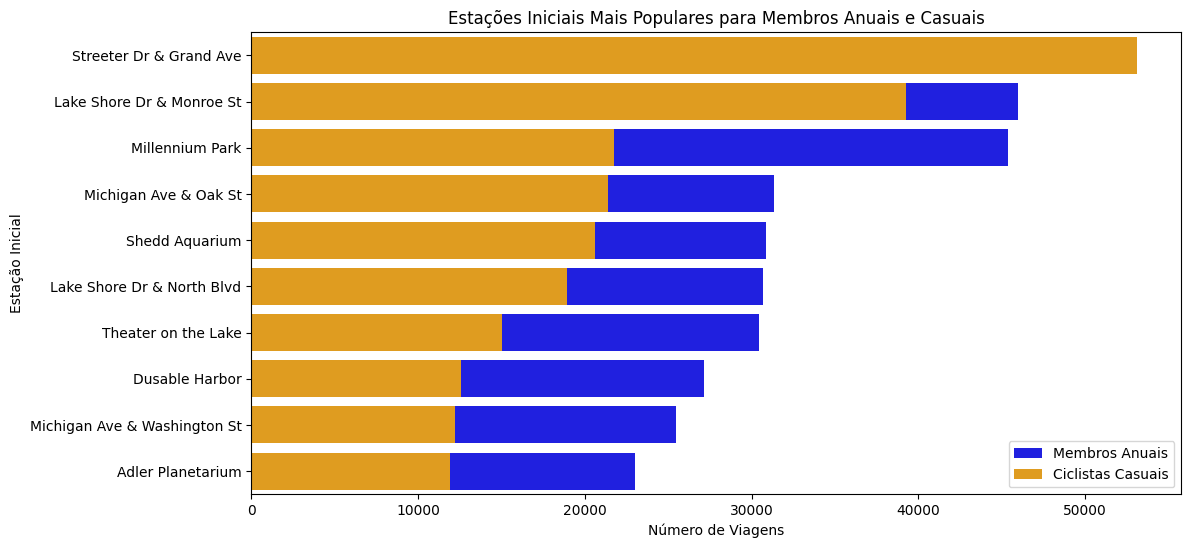

In [18]:
# Estações mais populares para membros anuais
top_start_stations_anual = data[data['usertype'] == 'Subscriber']['from_station_name'].value_counts().head(10)

# Estações mais populares para ciclistas casuais
top_start_stations_casual = data[data['usertype'] == 'Customer']['from_station_name'].value_counts().head(10)

# Visualizar as estações mais populares
plt.figure(figsize=(12, 6))
sns.barplot(x=top_start_stations_anual.values, y=top_start_stations_anual.index, color='blue', label='Membros Anuais')
sns.barplot(x=top_start_stations_casual.values, y=top_start_stations_casual.index, color='orange', label='Ciclistas Casuais')
plt.title('Estações Iniciais Mais Populares para Membros Anuais e Casuais')
plt.xlabel('Número de Viagens')
plt.ylabel('Estação Inicial')
plt.legend()
plt.show()

## Analysis of the most popular stations for both types of users

Streeter Dr & Grand Ave:

- This station may be located in an area with high user demand, such as a residential, commercial or tourist region.
- Proximity to local attractions or leisure areas can make it a popular choice for starting trips.

Lake Shore Dr & Monroe St:

- The lakeside location could make this station a convenient option for users looking to start trips along the waterfront.
- Nearby parks or attractions may contribute to the popularity of this season.

Millennium Park:

- As an iconic and central location, Millennium Park attracts both residents and visitors.
- The station near the park can be a convenient choice for those who want to explore the area or use bicycles for leisure.

---

### Possible Implications for the Company:

- Strategic Location: The most popular stations are strategically located in high demand areas. The company may consider expanding station presence in similar areas to meet growing demand.

- Tourist Attractions: The presence of stations close to tourist attractions indicates an opportunity for partnerships or promotions aimed at tourists.

- Infrastructure and Maintenance: Given the popularity of these stations, it is crucial to ensure good infrastructure and maintenance to offer a positive experience to users.

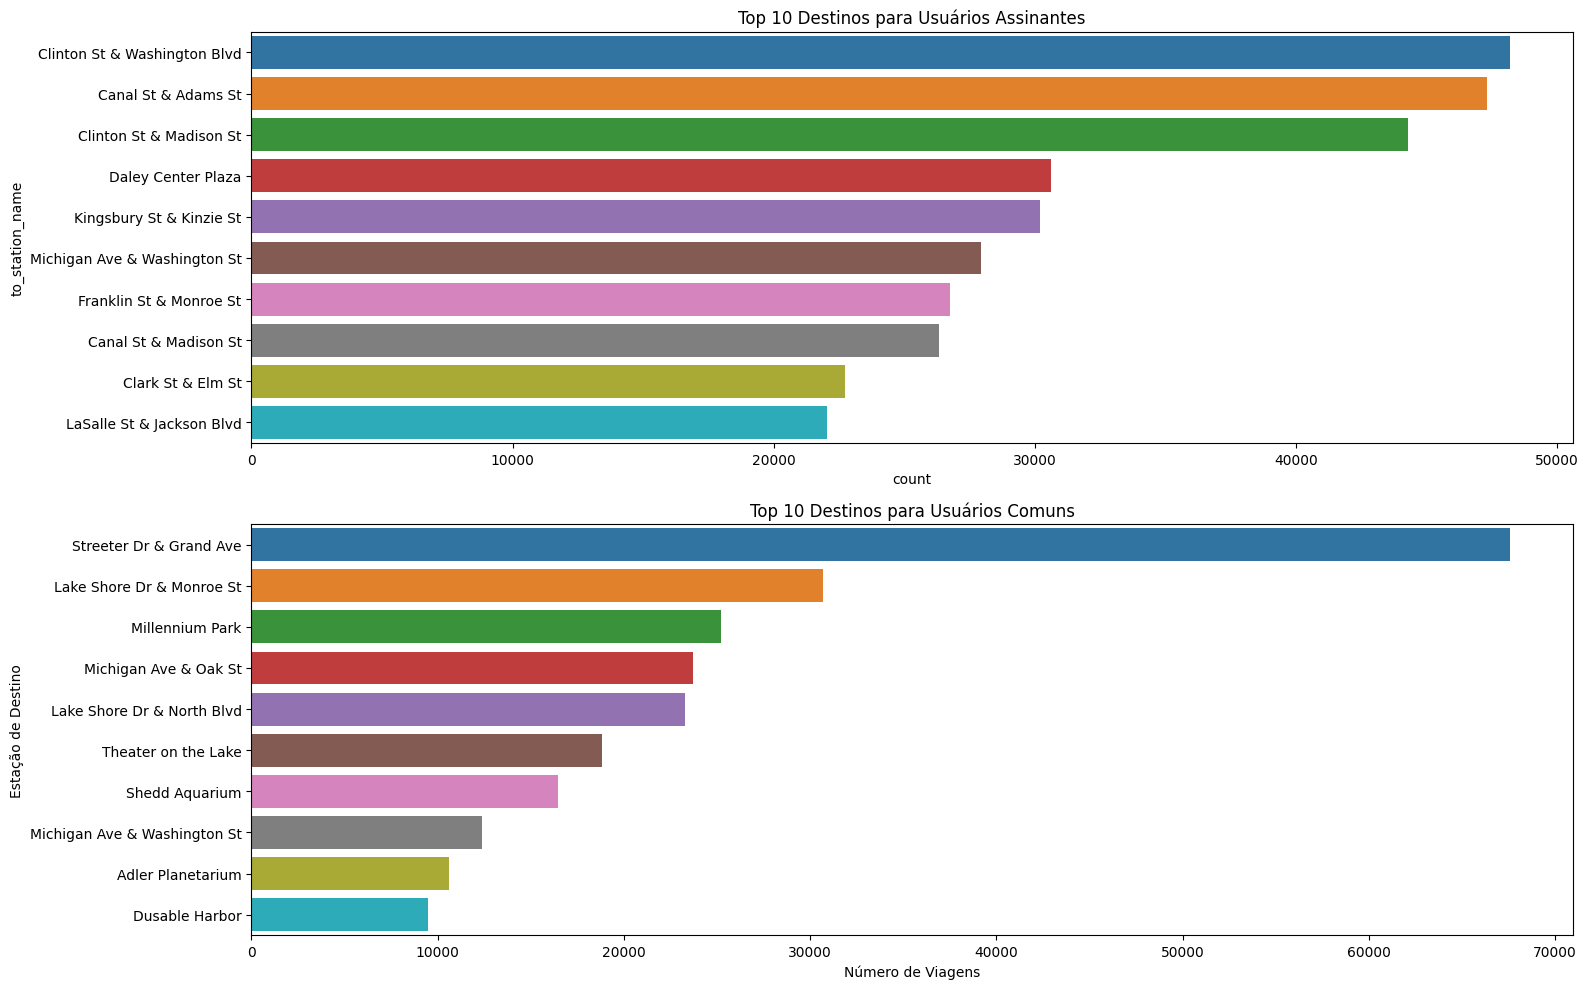

In [37]:
# Calcular contagem de viagens para cada destino por tipo de usuário
destinations_year = data.groupby(['to_station_name', 'usertype']).size().reset_index(name='count')

# Filtrar os 10 destinos mais populares para cada tipo de usuário
top_destinations_subscriber_year = destinations_year[destinations_year['usertype'] == 'Subscriber'].nlargest(10, 'count')
top_destinations_customer_year = destinations_year[destinations_year['usertype'] == 'Customer'].nlargest(10, 'count')

# Criar gráficos de barras separados para cada tipo de usuário
plt.figure(figsize=(16, 10))

plt.subplot(2, 1, 1)
sns.barplot(x='count', y='to_station_name', data=top_destinations_subscriber_year, order=top_destinations_subscriber_year['to_station_name'])
plt.title('Top 10 Destinos para Usuários Assinantes')

plt.subplot(2, 1, 2)
sns.barplot(x='count', y='to_station_name', data=top_destinations_customer_year, order=top_destinations_customer_year['to_station_name'])
plt.title('Top 10 Destinos para Usuários Comuns')

# Ajustes adicionais para legibilidade
plt.xlabel('Número de Viagens')
plt.ylabel('Estação de Destino')
plt.tight_layout()

# Salvar as imagens
plt.savefig('top_destinos_por_user_year.png')
plt.show()

## The most popular destinations

### Subscribers:

Clinton St & Washington Blvd:

- This could be a residential or commercial area popular with subscribers.
- Proximity to public transport stations or points of interest can contribute to popularity.

Canal St & Adams St:

- Located in a commercial or business area, this station may be frequently used by subscribers traveling to work or meetings.

Clinton St & Madison St:

- Similar to the first station, this area can be residential or commercial, making it convenient for subscribers.

### Common Users:

Streeter Dr & Grand Ave:

- This station is also one of the most popular home stations for both types of users.
- Strategic location close to tourist attractions or leisure areas can attract common users.

Lake Shore Dr & Monroe St:

- Located on the lakefront, this destination may be attractive to ordinary users who want to enjoy walks along the shore.

Millennium Park:

- As mentioned previously, Millennium Park is an iconic location, attracting both subscribers and ordinary users.

---

### Possible Implications for the Company:

Meeting Diverse Needs: The company can adjust marketing strategies and promotions based on popular destinations to meet the specific needs of subscribers and common users.

Partnerships with Local Establishments: Collaborations with commercial establishments close to popular destinations can further encourage the use of the service.

Station Network Expansion: If these destinations continue to attract a large number of users, the company may consider expanding the station network in these areas.

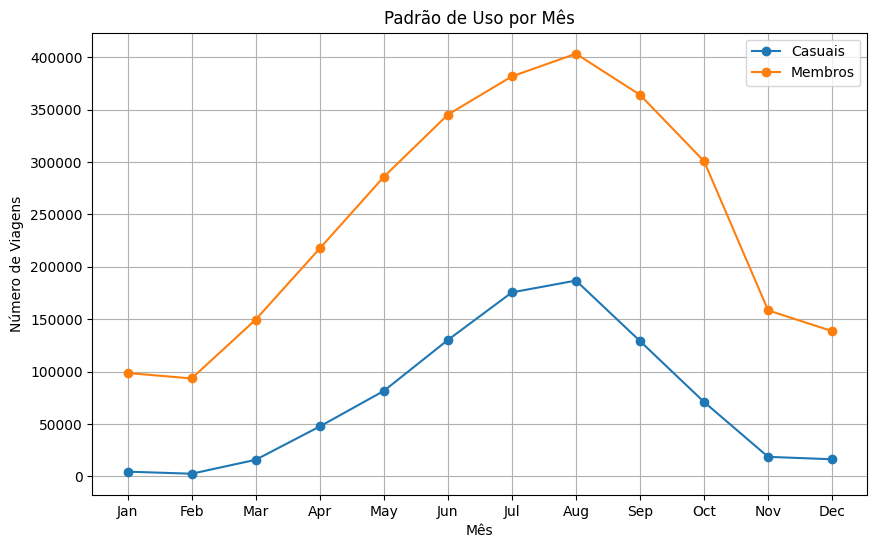

In [33]:
# Extrair o mês da coluna 'start_time'
data['start_month'] = data['start_time'].dt.month

# Criar DataFrame separado para usuários casuais e membros
casual_data = data[data['usertype'] == 'Customer']
member_data = data[data['usertype'] == 'Subscriber']

# Contar o número de viagens por mês para usuários casuais e membros
casual_monthly_counts = casual_data['start_month'].value_counts().sort_index()
member_monthly_counts = member_data['start_month'].value_counts().sort_index()

# Criar um gráfico de linha para usuários casuais e membros
plt.figure(figsize=(10, 6))
plt.plot(casual_monthly_counts.index, casual_monthly_counts.values, marker='o', label='Casuais')
plt.plot(member_monthly_counts.index, member_monthly_counts.values, marker='o', label='Membros')
plt.title('Padrão de Uso por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Viagens')
plt.xticks(casual_monthly_counts.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

## Usage Pattern Throughout the Year
​
### Weakest Months (January, February, November, December):
​
Lower demand during the winter months.
Possible influence of adverse weather conditions, such as intense cold.
​
### Gradual Increase from March:
​
There was a recovery in usage from March onwards.
Possible coincidence with the beginning of spring, suggesting greater willingness among users for outdoor activities.
​
### Peak Usage between June and September:
​
The summer months see the highest levels of usage.
More favorable climate encourages the use of bicycles for leisure and commuting.
​
---
​
### Implications for the Company:
​
Based on the analysis of the usage pattern throughout the year, some important implications for the company can be considered:
​
### Operational Planning:
​
During weaker months, the company can optimize operations, considering lower demand.
In peak months, temporary expansion strategies, such as increasing the bicycle fleet or pick-up/drop-off points, can be implemented.
​
### Segmented Marketing Campaigns:
​
The company can develop segmented marketing campaigns, promoting the service more intensely in the months that historically show greater demand.
Special offers or seasonal discounts can encourage usage during slower periods.
​
### Preventative Maintenance:
​
During the months of lower use, it may be an opportunity to carry out preventative maintenance on the bicycle fleet.
This ensures the bikes are in optimal condition when demand increases.
​
### Community Engagement:
​
Community engagement strategies can be developed, such as local events or partnerships, to maintain awareness of the service year-round.